In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

filename = '50_startups.csv'
data = pd.read_csv(filename)

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


In [73]:
data.groupby('State').mean()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


In [82]:
data.sort_values(by = ['State', 'R&D Spend', 'Administration', 'Marketing Spend'])

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.00,116983.80,45173.06,California,14681.40
47,0.00,135426.92,0.00,California,42559.73
44,22177.74,154806.14,28334.72,California,65200.33
42,23640.93,96189.63,148001.11,California,71498.49
40,28754.33,118546.05,172795.67,California,78239.91
39,38558.51,82982.09,174999.30,California,81005.76
37,44069.95,51283.14,197029.42,California,89949.14
34,46426.07,157693.92,210797.67,California,96712.80
32,63408.86,129219.61,46085.25,California,97427.84
25,64664.71,139553.16,137962.62,California,107404.34


In [18]:
data['R&D Spend'].describe()

count        50.000000
mean      73721.615600
std       45902.256482
min           0.000000
25%       39936.370000
50%       73051.080000
75%      101602.800000
max      165349.200000
Name: R&D Spend, dtype: float64

### Option 1 : numpy + sklearn

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# convert text into numerical indexing
le = LabelEncoder()
X[:,3] = le.fit_transform(X[:,3])
# convert numerical indexing into categorical array
ohe = OneHotEncoder(categorical_features = [3])
X = ohe.fit_transform(X).toarray()
# avoid dummy variable trap
X = X[:,1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###### test each individual variable: do single variable linear regression

R&D Spend : k/n
Administration : r/n
Marketing Spend : b/n


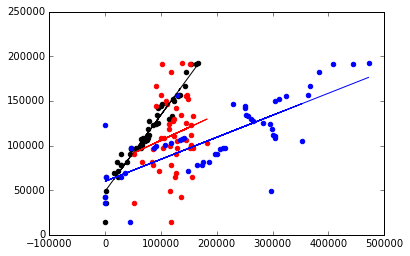

In [44]:
from sklearn.linear_model import LinearRegression
tlr = LinearRegression()
col = data.columns
colors = ['k','r', 'b', 'g']
ty = data.iloc[:,-1].values
for i in range(len(col)-2):
    colname = col[i]
    print colname + ' : ' + colors[i] + '\n'
    tX = data.iloc[:, i:i+1].values
    tlr.fit(tX, ty)
    plt.plot(tX, tlr.predict(tX), color = colors[i])
    plt.scatter(tX, ty, color = colors[i])
#     for s in range(len(states)):
#         plt.scatter(data[data.State == states[s]].iloc[:, i:i+1].values, data[data.State == states[s]].iloc[:,-1].values, 
#                     color = colors[s])

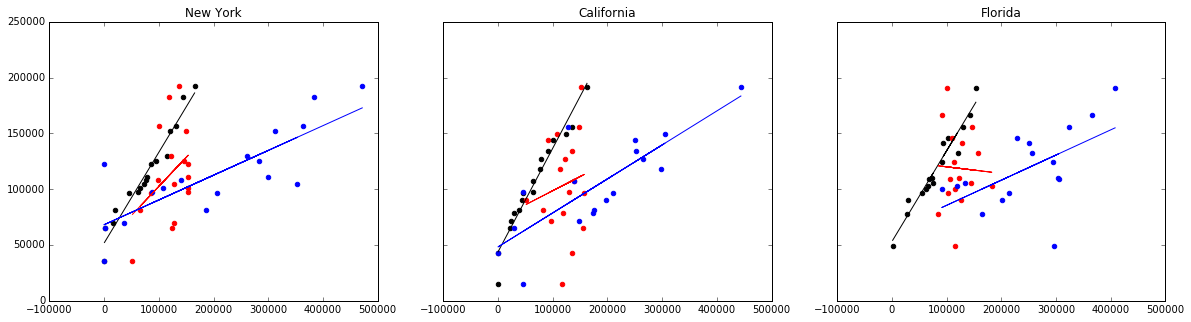

In [56]:
states = data.State.unique()
f, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
for s in range(len(states)):
    for i in range(len(col)-2):
        tX = data[data.State == states[s]].iloc[:, i:i+1].values
        ty = data[data.State == states[s]].iloc[:,-1].values
        tlr.fit(tX, ty)
        axes[s].plot(tX, tlr.predict(tX), color = colors[i])
        axes[s].scatter(tX, ty, color = colors[i])
        axes[s].set_title(states[s])
plt.show()

###### multivariant regression

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print 'r-square of training set: \n' 
print lr.score(X_train, y_train)
print '\n r-square of testing set: \n'  
print lr.score(X_test, y_test)

r-square of training set: 

0.950184762749

 r-square of testing set: 

0.934706847328


In [47]:
y_test

array([ 103282.38,  144259.4 ,  146121.95,   77798.83,  191050.39,
        105008.31,   81229.06,   97483.56,  110352.25,  166187.94])

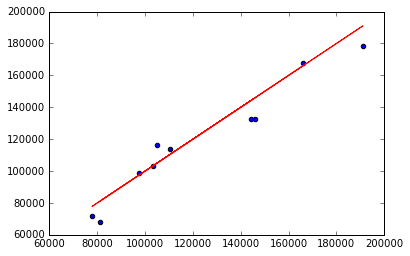

In [63]:
y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
plt.show()

### Option 2 : pandas + statsmodel.api

##### pandas way to convert to categorical codes 

In [83]:
import statsmodels.api as sm
data['state_code'] = pd.Categorical(data.State).codes
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,state_code
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


##### pandas way to convert to dummy columns

In [84]:
data = pd.get_dummies(data, columns=["State"], prefix=["state"])
del data['state_code']
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,state_California,state_Florida,state_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [104]:
strDepend = 'Profit'
cols = data.columns
cols = cols[cols != strDepend]
X = data[cols]
# avoid dummy variable trap ~
X = X.drop(cols[-1], axis=1) 
y = data[strDepend]

# add constant for sm
X = sm.add_constant(X)
 
ols = sm.OLS(y, X)
result = ols.fit()
     
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 11 Apr 2017   Prob (F-statistic):           1.34e-27
Time:                        14:20:16   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
state_California    41.8870   3256.039      0.013      0.990   -6520.229    6604.003
state_Florida      240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
result.pvalues.index

Index([u'const', u'R&D Spend', u'Administration', u'Marketing Spend',
       u'state_California', u'state_Florida'],
      dtype='object')

### backward elimination

###### the numpy way used in the course

In [ ]:
import statsmodels.fomula.api as smf
X = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit

###### pandas way (preferred)

In [117]:
strDepend = 'Profit'
cols = data.columns
cols = cols[cols != strDepend]
X = data[cols]
# avoid dummy variable trap ~
X = X.drop(cols[-1], axis=1) 
y = data[strDepend]

# add constant for sm
X = sm.add_constant(X)
SL = 0.065
p = 1

while p >= SL: 
    ols = sm.OLS(y, X)
    result = ols.fit()
    
    pvalues = result.pvalues.values
    maxindex = pvalues.argmax()
    p = pvalues[maxindex]
    predictor = result.pvalues.index[maxindex]
    
    if len(X) > 1:
        X = X.drop(predictor, axis = 1)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 11 Apr 2017   Prob (F-statistic):           2.16e-31
Time:                        14:42:35   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""